# View ROMY event

## Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
import obspy 

from andbro__querrySeismoData import __querrySeismoData
from andbro__savefig import __savefig

In [2]:
def __read_event_info(config):
    
    from obspy import UTCDateTime
    
    tbeg = input("Enter UTC starttime (2022-06-01 12:00): ") or None
    tend = input("Enter UTC endtime   (2022-06-01 15:00): ") or None
    
    if tbeg is None or tend is None:
        print(" -> Starttime or endtime not correct! Aborting...")
        sys.exit()
    else:
        config['tbeg'] = UTCDateTime(tbeg)
        config['tend'] = UTCDateTime(tend)
        
    if config['tbeg'] > config['tend']:
        print(" -> Starttime is after endtime! Aborting...")
        sys.exit()
        
    return config

## Configurations

In [3]:
## create config object
config = {}

In [5]:
## set path for figures
config['outpath_figs'] = "/home/brotzer/Desktop/tmp/"


## Austria
# config['tbeg'] = obspy.UTCDateTime("2022-05-04 09:48")
# config['tend'] = obspy.UTCDateTime("2022-05-04 09:51")


## get event details
config = __read_event_info(config)

## saving_options
config['save_figs']   = True
config['save_stream'] = False
config['save_config'] = False

## set stations
config['seeds'] = ["BW.RLAS..BJZ", "BW.ROMY.10.BJZ", "BW.ROMY..BJU", "BW.ROMY..BJV", "BW.ROMY..BJW"]

config['repository'] = "george"

Enter UTC starttime (2022-06-01 12:00): 2022-06-04 13:00
Enter UTC endtime   (2022-06-01 15:00): 2022-06-04 16:00


In [6]:
from andbro__get_filter_info import __getFilterInfo

config = __getFilterInfo(config)


Set Filter (yes/[no])?  y

Enter filter type (bp, lp, hp): bp

Enter lower corner frequency (in Hz): 0.01
Enter upper corner frequency (in Hz): 0.1

_____________________________________________________



## Load Data

In [37]:
from andbro__get_stream import __getStream

st0 = __getStream(config)

# st0.plot(equal_scale=False);

loading BW.RLAS..BJZ...
 -> removing sensitivity...
loading BW.ROMY.10.BJZ...
 -> removing sensitivity...
loading BW.ROMY..BJU...
 -> removing sensitivity...
 -> merging stream...
loading BW.ROMY..BJV...
 -> removing sensitivity...
loading BW.ROMY..BJW...
 -> removing sensitivity...
 -> merging stream...

completed loading
 -> trimming stream...


In [45]:
st0 = st0.split()

## Processing

Apply demean and filter as set before.

In [56]:
from andbro__filterStream import __filterStream
from numpy.ma import is_masked
    
masked = [True  if is_masked(tr.data) else False for tr in st0]

if masked: 
    st0 = st0.split();
    
st0.detrend('simple')
st0.taper(0.1)

st = __filterStream(st0, config)

if masked:
    st.merge();
    
# st.plot(equal_scale=False);

15 Trace(s) in Stream:
BW.ROMY..BJU   | 2022-06-04T13:00:00.011199Z - 2022-06-04T14:05:53.461199Z | 20.0 Hz, 79070 samples
BW.ROMY..BJU   | 2022-06-04T14:05:53.611199Z - 2022-06-04T15:59:59.961199Z | 20.0 Hz, 136928 samples
BW.ROMY..BJW   | 2022-06-04T13:00:00.004399Z - 2022-06-04T13:10:13.554399Z | 20.0 Hz, 12272 samples
BW.ROMY..BJW   | 2022-06-04T13:10:19.054399Z - 2022-06-04T13:31:17.454399Z | 20.0 Hz, 25169 samples
BW.ROMY..BJW   | 2022-06-04T13:31:26.254399Z - 2022-06-04T13:52:24.604399Z | 20.0 Hz, 25168 samples
BW.ROMY..BJW   | 2022-06-04T13:52:30.754399Z - 2022-06-04T14:13:29.104399Z | 20.0 Hz, 25168 samples
BW.ROMY..BJW   | 2022-06-04T14:13:35.854399Z - 2022-06-04T14:34:34.254399Z | 20.0 Hz, 25169 samples
BW.ROMY..BJW   | 2022-06-04T14:34:40.454399Z - 2022-06-04T14:55:38.904399Z | 20.0 Hz, 25170 samples
BW.ROMY..BJW   | 2022-06-04T14:55:46.454399Z - 2022-06-04T15:16:44.904399Z | 20.0 Hz, 25170 samples
BW.ROMY..BJW   | 2022-06-04T15:16:51.354399Z - 2022-06-04T15:37:49.754399Z |

15 Trace(s) in Stream:
BW.ROMY..BJU   | 2022-06-04T13:00:00.011199Z - 2022-06-04T14:05:53.461199Z | 20.0 Hz, 79070 samples
BW.ROMY..BJU   | 2022-06-04T14:05:53.611199Z - 2022-06-04T15:59:59.961199Z | 20.0 Hz, 136928 samples
BW.ROMY..BJW   | 2022-06-04T13:00:00.004399Z - 2022-06-04T13:10:13.554399Z | 20.0 Hz, 12272 samples
BW.ROMY..BJW   | 2022-06-04T13:10:19.054399Z - 2022-06-04T13:31:17.454399Z | 20.0 Hz, 25169 samples
BW.ROMY..BJW   | 2022-06-04T13:31:26.254399Z - 2022-06-04T13:52:24.604399Z | 20.0 Hz, 25168 samples
BW.ROMY..BJW   | 2022-06-04T13:52:30.754399Z - 2022-06-04T14:13:29.104399Z | 20.0 Hz, 25168 samples
BW.ROMY..BJW   | 2022-06-04T14:13:35.854399Z - 2022-06-04T14:34:34.254399Z | 20.0 Hz, 25169 samples
BW.ROMY..BJW   | 2022-06-04T14:34:40.454399Z - 2022-06-04T14:55:38.904399Z | 20.0 Hz, 25170 samples
BW.ROMY..BJW   | 2022-06-04T14:55:46.454399Z - 2022-06-04T15:16:44.904399Z | 20.0 Hz, 25170 samples
BW.ROMY..BJW   | 2022-06-04T15:16:51.354399Z - 2022-06-04T15:37:49.754399Z |


 Applying bandpass...



5 Trace(s) in Stream:
BW.ROMY..BJU   | 2022-06-04T13:00:00.011199Z - 2022-06-04T15:59:59.961199Z | 20.0 Hz, 216000 samples (masked)
BW.ROMY..BJW   | 2022-06-04T13:00:00.004399Z - 2022-06-04T15:59:59.954399Z | 20.0 Hz, 216000 samples (masked)
BW.RLAS..BJZ   | 2022-06-04T12:59:59.975750Z - 2022-06-04T15:59:59.975750Z | 20.0 Hz, 216001 samples
BW.ROMY..BJV   | 2022-06-04T13:00:00.021600Z - 2022-06-04T15:59:59.971600Z | 20.0 Hz, 216000 samples
BW.ROMY.10.BJZ | 2022-06-04T12:59:59.975800Z - 2022-06-04T15:59:59.975800Z | 20.0 Hz, 216001 samples


   -> saving /home/brotzer/Desktop/tmp/TraceSpectrum_2022-06-04.png.png ...

   -> Done



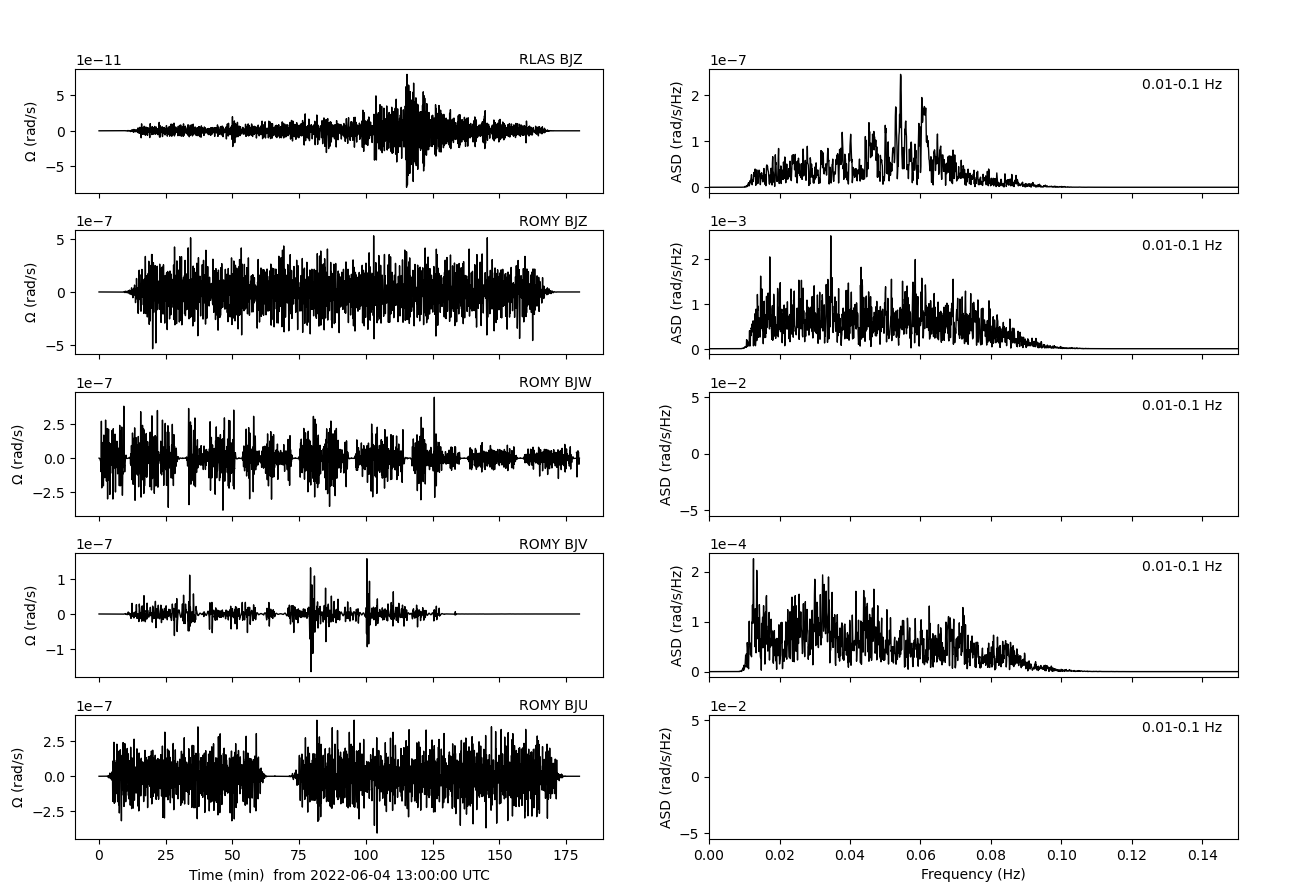

In [62]:
def __makeplot_sectra(st, config):
    
    from scipy import fftpack

    plt.style.use('default')


    fig, axes = plt.subplots(5,2,figsize=(15,10), sharex='col')

    plt.subplots_adjust(hspace=0.3)

    ## _______________________________________________

    st.sort(keys=['channel'], reverse=True)
    
    for i, tr in enumerate(st):


        comp_fft = np.abs(fftpack.fft(tr.data))
        ff       = fftpack.fftfreq(comp_fft.size, d=1/tr.stats.sampling_rate)
        comp_fft = fftpack.fftshift(comp_fft)


        ## _________________________________________________________________
        axes[i,0].plot(
                    tr.times()/60,
                    tr.data,
                    color='black',
                    label='{} {}'.format(tr.stats.station, tr.stats.channel),
                    lw=1.0,
                    )


        ## _________________________________________________________________
        axes[i,1].plot(
                    ff[1:len(ff)//2],
                    np.abs(fftpack.fft(tr.data)[1:len(ff)//2]),
                    color='black',
                    lw=1.0,
                    )


        
        axes[i,0].set_ylabel(r'$\Omega$ (rad/s)')    
        axes[i,1].set_ylabel('ASD (rad/s/Hz)')        
#         axes[i,0].legend(loc='upper left',bbox_to_anchor=(0.8, 1.10), framealpha=1.0)
        axes[i,0].annotate('{} {}'.format(tr.stats.station, tr.stats.channel), 
                           xy=(0.4,0.928+i*-0.181),
                           xycoords='figure fraction', 
                           )
        axes[i,0].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
        axes[i,1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    
        if config['set_filter']:
            if config['filter_type'] == "bandpass":
                axes[i,1].annotate('{}-{} Hz'.format(config['lower_corner_frequency'], config['upper_corner_frequency']), xy=(0.88,0.90+i*-0.18), xycoords='figure fraction')
            elif config['filter_type'] == "lowpass":
                axes[i,1].annotate('<{} Hz'.format(config['upper_corner_frequency']), xy=(0.88,0.90+i*-0.18), xycoords='figure fraction')
            elif config['filter_type'] == "highpass":
                axes[i,1].annotate('>{} Hz'.format(config['lower_corner_frequency']), xy=(0.88,0.90+i*-0.18), xycoords='figure fraction')

        if config['upper_corner_frequency'] is not None:
            
            axes[i,1].set_xlim(0, 1.5*config['upper_corner_frequency'])
#         axes[i,1].set_yscale('logit')

        if i == len(st)-1:
            axes[i,0].set_xlabel('Time (min)  from {} {} UTC'.format(tr.stats.starttime.date, str(tr.stats.starttime.time)[0:8]))
            axes[i,1].set_xlabel('Frequency (Hz)')
    
    
    ## save figure if specified in configurations
    if config['save_figs']:
        __savefig(fig, outpath=config['outpath_figs'], outname=f"TraceSpectrum_{config['tbeg'].date}"+".png", mode="png");

    return fig


## __________________________________

fig = __makeplot_sectra(st, config)